In [1]:
#libraries
library(AER)
library(tseries)
library(dynlm)
library(stargazer)
library(forecast)



Loading required package: car
Loading required package: carData
Loading required package: lmtest
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich
Loading required package: survival

Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 



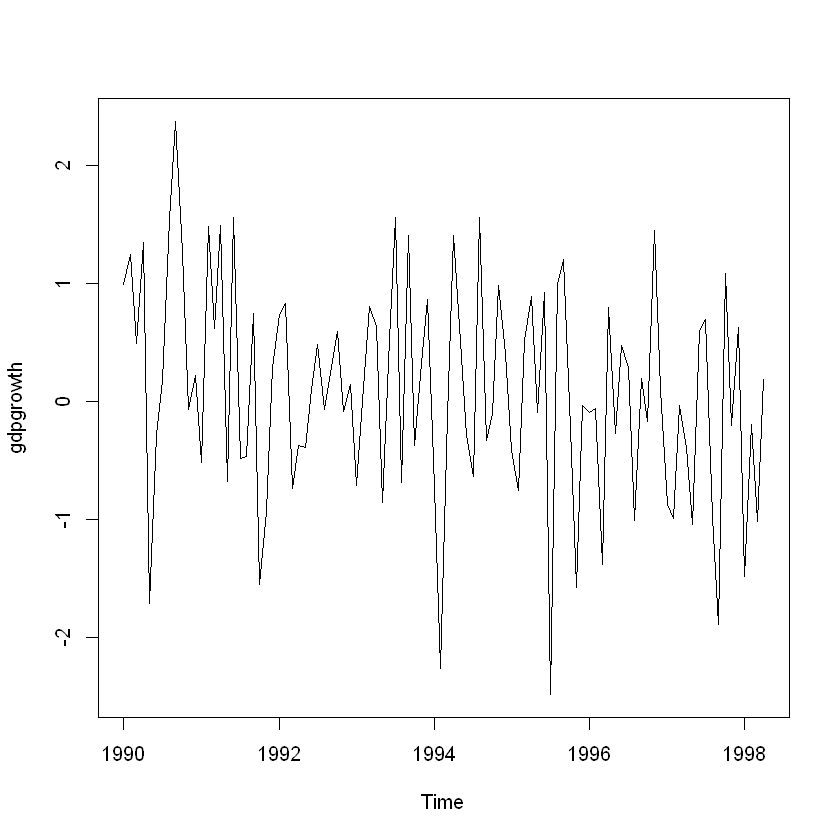

In [2]:

#Create random data
gdpgrowth <- rnorm(100)

#Declare it as time series with ts()
gdpgrowth <- ts(gdpgrowth,start=c(1990,1),frequency=12)

#Plot our time series
plot(gdpgrowth)



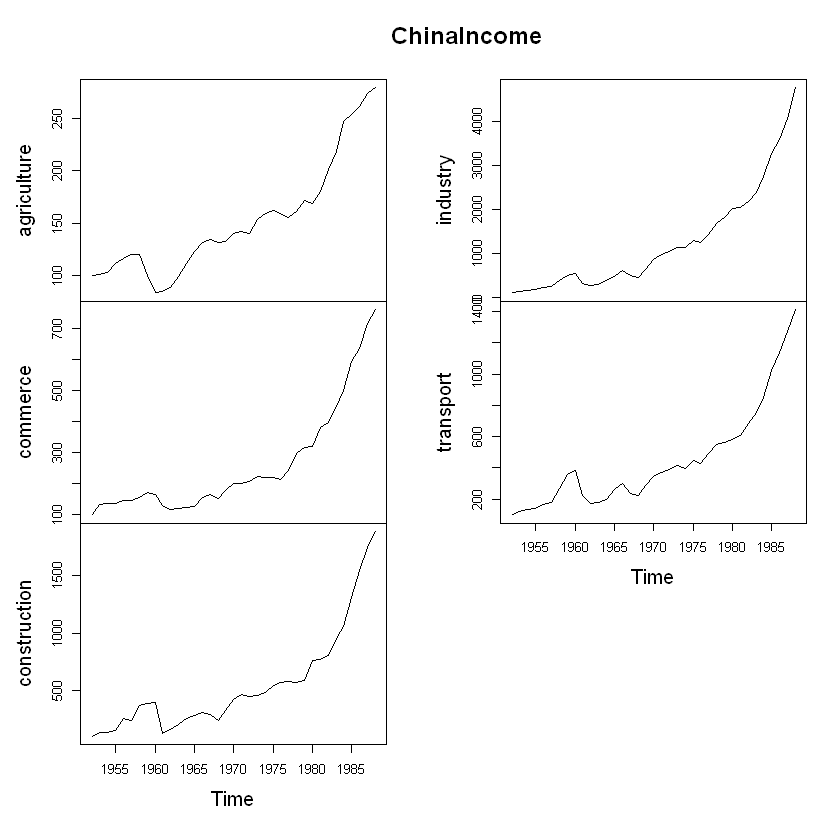

In [3]:
#Bring in some China datad
data("ChinaIncome")

#Plot China data
plot(ChinaIncome)


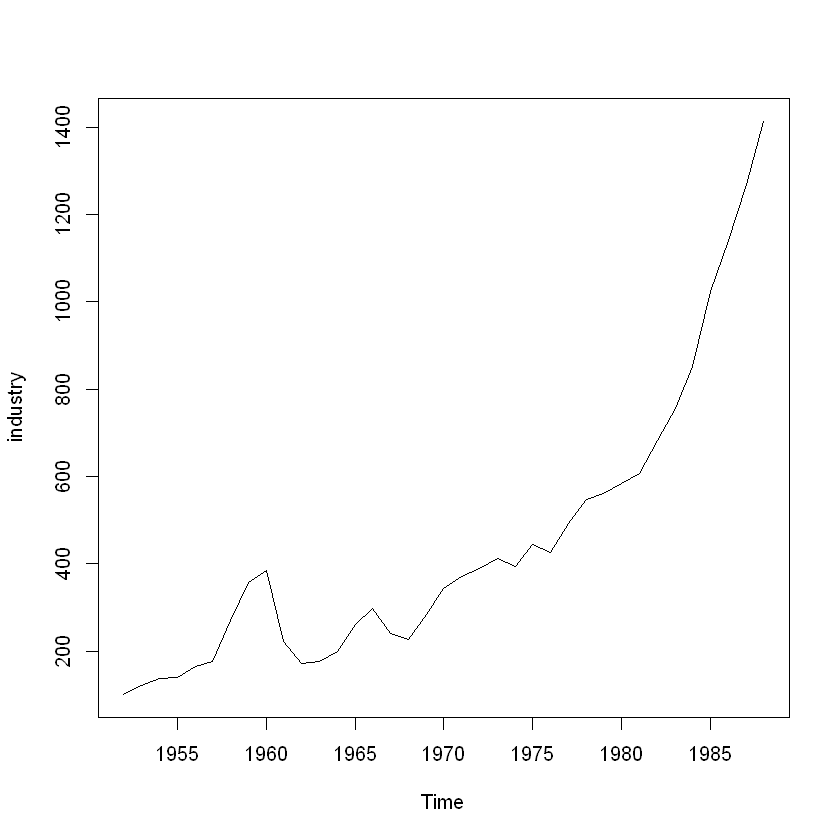

In [4]:

#Pull out one of the time series
industry <- ChinaIncome[,5]
plot(industry)


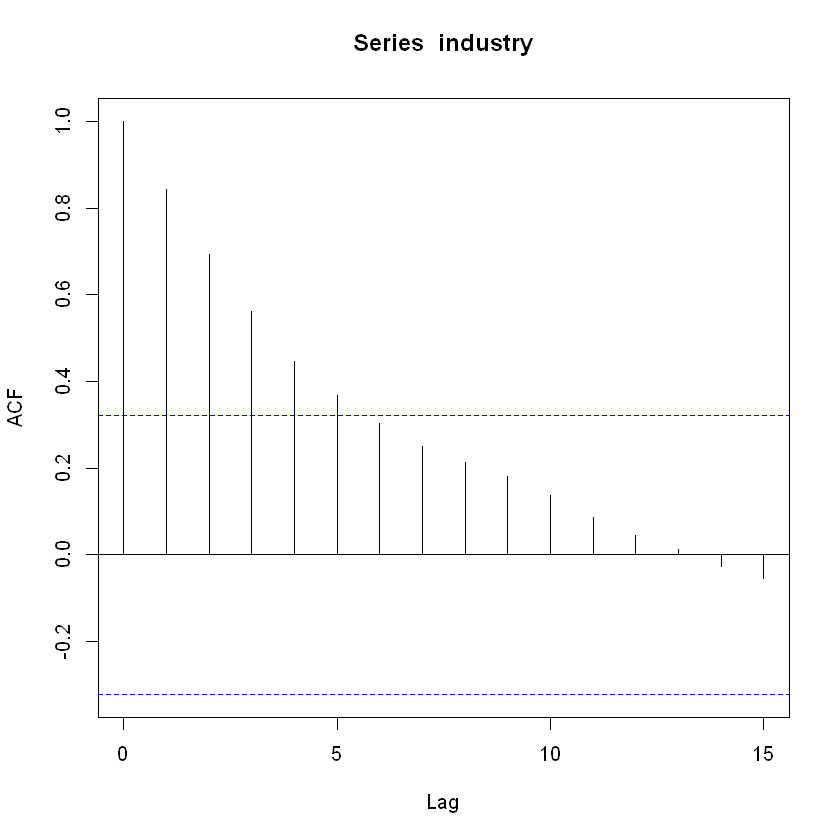

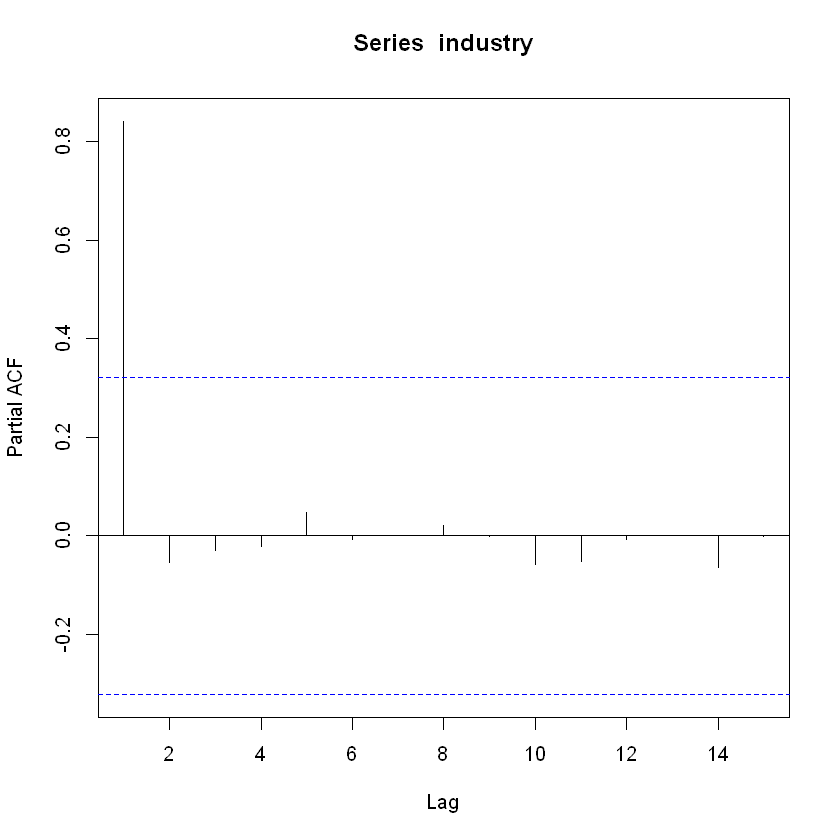

In [5]:

#Autocorrelation plot
acf(industry)
#Partial autocorrelation function
pacf(industry)


In [6]:

#Dickey-Fuller test
adf.test(industry)



Warning message in adf.test(industry):
"p-value greater than printed p-value"


	Augmented Dickey-Fuller Test

data:  industry
Dickey-Fuller = 1.698, Lag order = 3, p-value = 0.99
alternative hypothesis: stationary


In [7]:
#Run a regression with a lag value
tsreg <- dynlm(industry~L(industry))
stargazer(tsreg,type='text')



                        Dependent variable:    
                    ---------------------------
                             industry          
-----------------------------------------------
L(industry)                  1.119***          
                              (0.030)          
                                               
Constant                      -13.979          
                             (15.176)          
                                               
-----------------------------------------------
Observations                    36             
R2                             0.977           
Adjusted R2                    0.976           
Residual Std. Error      50.941 (df = 34)      
F Statistic          1,415.120*** (df = 1; 34) 
Note:               *p<0.1; **p<0.05; ***p<0.01


In [8]:
tsreg2 <- dynlm(industry~L(industry,1:3))
stargazer(tsreg2,type='text')



                        Dependent variable:    
                    ---------------------------
                             industry          
-----------------------------------------------
L(industry, 1:3)1            1.461***          
                              (0.175)          
                                               
L(industry, 1:3)2            -0.661**          
                              (0.296)          
                                               
L(industry, 1:3)3              0.318           
                              (0.199)          
                                               
Constant                      -16.296          
                             (17.222)          
                                               
-----------------------------------------------
Observations                    34             
R2                             0.979           
Adjusted R2                    0.977           
Residual Std. Error      49.951 (df = 3

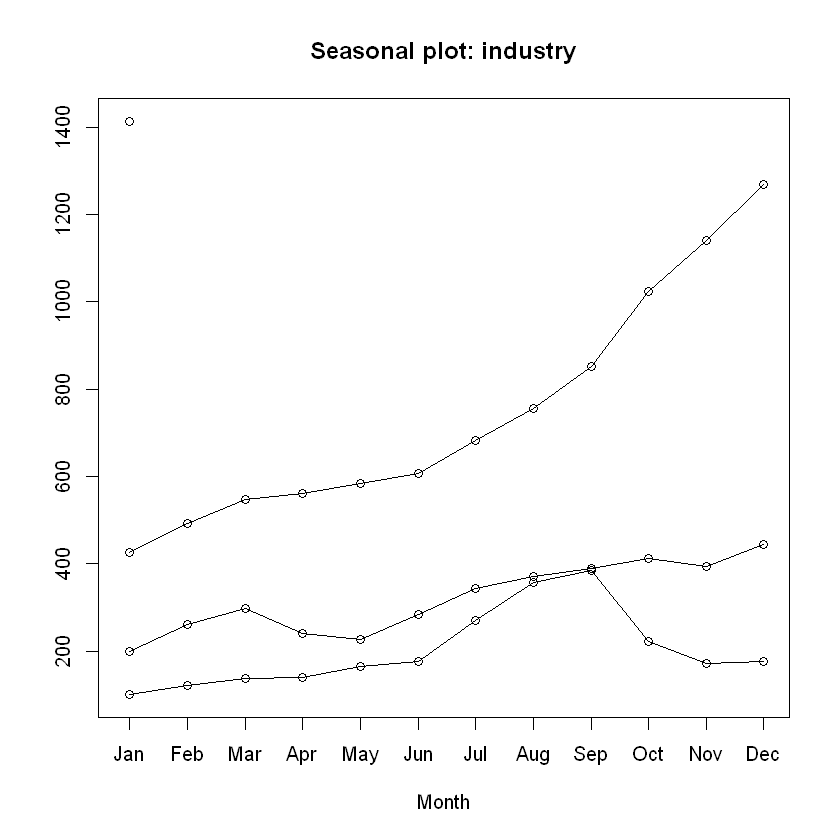

In [9]:

#Tell R the seasonality of our time series
industry <- ts(industry,frequency=12)
seasons <- stl(industry,s.window="period")

#Plot out a seasonality plot for industry
seasonplot(industry)

In [ ]:
#libraries
library(AER)
library(forecast)

#Bring in China data and get industry time series from it
data(ChinaIncome)
industry <- ChinaIncome[,5]

plot(industry)

#Run an ARIMA
arimamodel <- arima(industry,order=c(1,1,1))
summary(arimamodel)

#Forecast five periods into the future
forecast(arimamodel,5)
#plot that forecast
plot(forecast(arimamodel,5))
